<a href="https://colab.research.google.com/github/tutsilianna/Introduction_to_ML_and_Advanced_ML_Python/blob/main/Principal%20Component%20Analysis%20(PCA)/Principal_Component_Analysis_(PCA)_%7C_Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task**

Reduce the dimension using the sklearn library. Pay attention to the svd_solver parameter, it is responsible for the way the matrix decomposition is built. To get the same results (in particular, consistent with the lecture), use the following parameter of the PCA method:

svd_solver='full'.

[Read more about the PCA algorithm in the sklearn library.](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)


## Task 1

In the [file](https://drive.google.com/file/d/11Gq81tuje1_leAd0UuetMgQ3sTgw6CWO/view?usp=sharing) there is a set of synthetic data. The data describes 60 objects, each of which has 10 features. Your task is to switch to the new coordinates using principal components method and find the following parameters.


* Enter the coordinate of the first object with respect to the first principal component.
* Enter the coordinate of the first object with respect to the second principal component.
* Enter the fraction of variance explained when the first and the second principal components are used.
* What minimal number of principal components are to be used, so that the fraction of variance explained will exceed 0.85
* What number of groups the objects can be splitted in, if only the first and the second principal components are used?


> import all necessary moduls



In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/itmo|AI_cources/94_16.csv', encoding = 'utf-8', delimiter=',', header=None)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9
0,10.382991,-14.438544,-23.950798,-17.809813,2.480495,-15.743114,-9.112421,-27.390035,-11.955001,18.069910
1,18.987842,-13.071734,15.619164,-11.288528,-11.624820,14.845464,-4.924935,21.207876,-23.703025,4.440474
2,7.426000,-9.236580,-21.139348,6.732592,0.447684,-20.687020,-18.545136,7.758288,18.620790,-3.006755
3,10.718844,-10.240587,-20.604991,4.828083,-0.073568,-23.747055,-17.260869,7.074364,16.996747,-6.796469
4,10.662165,3.871777,12.384108,-1.921321,-1.990254,-5.469310,2.801321,-19.978717,23.414766,-2.654889


In [ ]:
pca = PCA(n_components=2, svd_solver='full').fit_transform(data)

In [ ]:
scores_df = pd.DataFrame(pca, columns=['PC1', 'PC2'])  # создаём дата-фрейм
scores_df.head()

,PC1,PC2
0,-19.057926,31.912614
1,47.942148,3.193052
2,-18.608124,-7.925824
3,-18.236440,-7.437417
4,-11.436757,-29.769527


In [ ]:
print(f'The coordinate of the first object with respect to the first principal component {round(scores_df["PC1"][0],3)}')

The coordinate of the first object with respect to the first principal component -19.058


In [ ]:
print(f'The coordinate of the first object with respect to the second principal component {round(scores_df["PC2"][0],3)}')

The coordinate of the first object with respect to the second principal component 31.913


In [ ]:
pca = PCA(n_components=2, svd_solver='full').fit(data)
print(f'The fraction of variance explained when the first and the second principal components are used = {round(sum(pca.explained_variance_ratio_), 3)}' )

The fraction of variance explained when the first and the second principal components are used = 0.781


In [ ]:
n = 2
while round(sum(pca.explained_variance_ratio_), 3) < 0.85:
    pca = PCA(n_components=3, svd_solver='full').fit(data)
    n += 1

In [ ]:
print(round(sum(pca.explained_variance_ratio_), 3), n)  # объяснённая дисперсия

0.991 3


In [ ]:
print(f'What minimal number of principal components are to be used, so that the fraction of variance explained will exceed 0.85? {n}')

What minimal number of principal components are to be used, so that the fraction of variance explained will exceed 0.85? 3


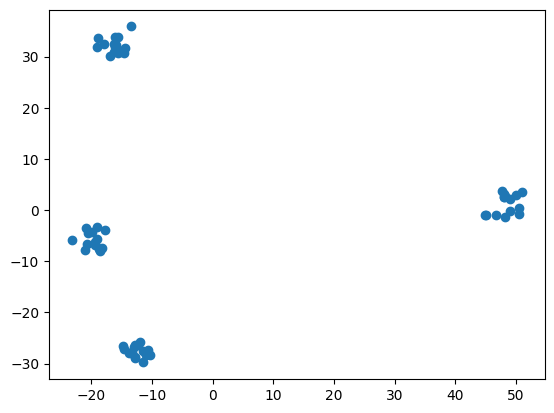

In [ ]:
# по 2-м компонентам
plt.scatter(scores_df.PC1, scores_df.PC2)
plt.show()  # на графике видно, что объекты по кучкам сгруппированы и их 4

In [ ]:
print(f'What number of groups the objects can be splitted in, if only the first and the second principal components are used? {4}')

What number of groups the objects can be splitted in, if only the first and the second principal components are used? 4


## Task 2

In order to enter the ITMO Christmas party you must find the correct party logo. In order to get the logo picture you must reconstruct the initial logo using the first 10 principal components (all guests have got [a score matrix](https://drive.google.com/file/d/1Eiob8TJsMGs_uiLgcCw9-R4GR77JzuE-/view?usp=drive_link) and [a loading matrix](https://drive.google.com/file/d/19Vw8cBgOWKXyrkR0l5EQIJKRbym5SAks/view?usp=drive_link) of the 10 first PCs).

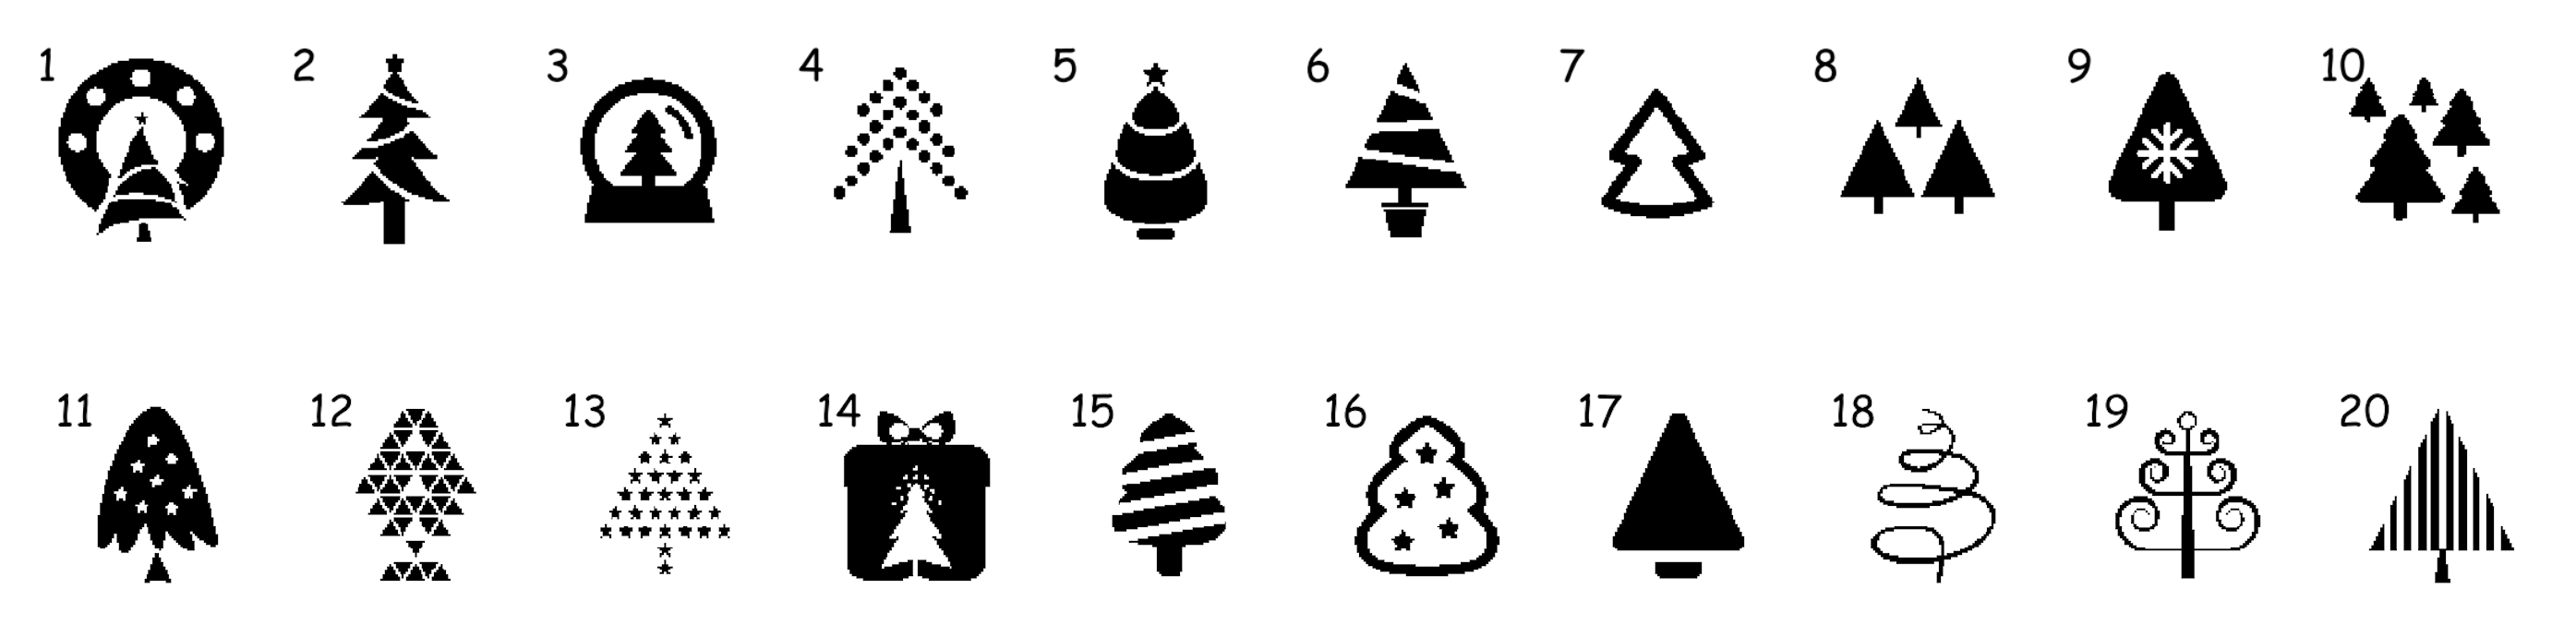

In [ ]:
score_matrix = pd.read_csv('/content/drive/MyDrive/itmo|AI_cources/X_reduced_417.csv', encoding = 'utf-8', delimiter=';', header=None)
score_matrix.head()

,0,1,2,3,4,5,6,7,8,9
0,-508.286332,162.042123,37.005014,-65.54305,-17.410187,25.619798,0.5544,20.309831,-4.297213,-7.462898
1,-508.286332,162.042123,37.005014,-65.54305,-17.410187,25.619798,0.5544,20.309831,-4.297213,-7.462898
2,-508.286332,162.042123,37.005014,-65.54305,-17.410187,25.619798,0.5544,20.309831,-4.297213,-7.462898
3,-508.286332,162.042123,37.005014,-65.54305,-17.410187,25.619798,0.5544,20.309831,-4.297213,-7.462898
4,-508.286332,162.042123,37.005014,-65.54305,-17.410187,25.619798,0.5544,20.309831,-4.297213,-7.462898


In [ ]:
loading_matrix = pd.read_csv('/content/drive/MyDrive/itmo|AI_cources/X_loadings_417.csv', encoding = 'utf-8', delimiter=';', header=None)
loading_matrix.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.180669e-17,1.279354e-17,5.879625e-18,-2.441192e-17,-1.186938e-17,2.082969e-17,6.411222e-19,2.523464e-17,-8.212252e-18,-1.646290e-17
1,-2.220446e-16,0.000000e+00,8.326673e-17,4.163336e-17,6.938894e-18,-1.040834e-16,2.387413e-16,-9.714451e-17,-4.336809e-17,-3.295975e-17
2,-0.000000e+00,0.000000e+00,0.000000e+00,-5.551115e-17,-6.938894e-17,-0.000000e+00,1.908196e-17,-5.551115e-17,7.285839e-17,-3.469447e-17
3,-0.000000e+00,0.000000e+00,8.326673e-17,-3.330669e-16,-1.110223e-16,5.551115e-17,1.474515e-17,1.110223e-16,1.040834e-16,-4.163336e-17
4,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.775558e-17,-2.775558e-17,-8.500145e-17,-1.110223e-16,-2.775558e-17,-2.775558e-17


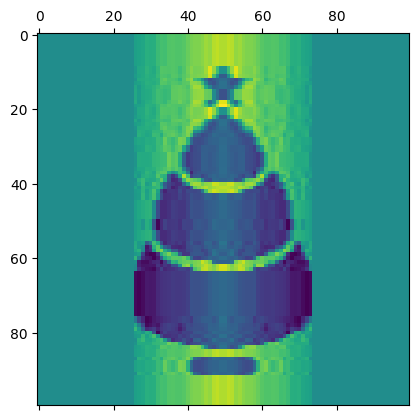

In [ ]:
F = np.dot(score_matrix, loading_matrix.T)
plt.matshow(F)
plt.show()